In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [151]:
from datetime import datetime

def time_to_seconds(t):
    dt = datetime.strptime(t, "%H:%M:%S.%f")
    return dt.hour * 3600 + dt.minute * 60 + dt.second + dt.microsecond / 1e6

vectorized_time_to_seconds = np.vectorize(time_to_seconds)

In [152]:
file_dir = "../simulation/measurements/files"

# particle_counts = [1500, 3500, 7500, 17000, 37000, 85000, 190000, 420000, 950000, 2200000, 5000000]
particle_counts = [10000, 1000000]
modes = ["computeShaders", "sequential", "parallel"]

In [153]:
# 06-12 18:24:49.724  7352  7409 I Timer   : Elapsed time: 17.248888 ms
# 06-12 18:24:49.738  7352  7409 I GpuTimerCompute: Elapsed time: 0.000313 ms
# 06-12 18:24:49.741  7352  7409 I GpuTimerRender: Elapsed time: 1.439792 ms
# 06-12 18:24:49.759  7352  7409 I CpuTimer: Elapsed time: 23.402828 ms
# 06-13 13:39:05.513 21531 21562 I CpuTimerCompute: Elapsed time: 18.706000 ms
# 06-12 18:24:49.941  7352  7436 I CpuTimerLoader: Elapsed time: 1284.709000 ms

pd_cs_t = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_cs_t = {}

pd_seq_t = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_seq_t = {}

pd_par_t = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_par_t = {}

pd_cs_m = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_cs_m = {}

pd_seq_m = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_seq_m = {}

pd_par_m = pd.DataFrame(columns=["time_stamp", "time",
                                "time_stamp_compute", "time_compute",
                                "time_stamp_compute_cpu", "time_compute_cpu",
                                "time_stamp_render", "time_render",
                                "time_stamp_cpu", "time_cpu",
                                "time_stamp_loader", "time_loader"
                            ])
pd_par_m = {}

for mode in modes:
    for count in particle_counts:
        file = open(f"{file_dir}/logs_{count}_{mode}1.txt", "r").read()

        all_times = []
        all_time_stamps = []
        all_times_compute = []
        all_compute_time_stamps = []
        all_times_compute_cpu = []
        all_compute_cpu_time_stamps = []
        all_times_render = []
        all_render_time_stamps = []
        all_times_cpu = []
        all_cpu_time_stamps = []
        all_times_loader = []
        all_loader_time_stamps = []
        for line in file.split("\n"):
            if "CpuTimerLoader" in line and count < 500000:  # For larger particle counts, not enough loader data is measured
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    all_times_loader.append(time)
                    time_stamp = line.split(" ")[1]
                    all_loader_time_stamps.append(time_stamp)

            elif "CpuTimerCompute" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    all_times_compute_cpu.append(time)
                    time_stamp = line.split(" ")[1]
                    all_compute_cpu_time_stamps.append(time_stamp)

            elif "CpuTimer" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    if not (time > 2*np.mean(all_times_cpu)):  # Remove values affected by loader time
                        all_times_cpu.append(time)
                        time_stamp = line.split(" ")[1]
                        all_cpu_time_stamps.append(time_stamp)

            elif "GpuTimerRender" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    all_times_render.append(time)
                    time_stamp = line.split(" ")[1]
                    all_render_time_stamps.append(time_stamp)

            elif "GpuTimerCompute" in line:
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    all_times_compute.append(time)
                    time_stamp = line.split(" ")[1]
                    all_compute_time_stamps.append(time_stamp)

            else:
                # "Timer" in line
                if "ms" in line:
                    time = float(line.split("Elapsed time: ")[1].split(" ")[0])
                    time_stamp = line.split(" ")[1]
                    all_times.append(time)
                    all_time_stamps.append(time_stamp)

        if mode == "computeShaders":
            if count == 10000:
                pd_cs_t["time_stamp"] = all_time_stamps
                pd_cs_t["time"] = all_times
                pd_cs_t["time_stamp_compute"] = all_compute_time_stamps
                pd_cs_t["time_compute"] = all_times_compute
                pd_cs_t["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_cs_t["time_compute_cpu"] = all_times_compute_cpu
                pd_cs_t["time_stamp_render"] = all_render_time_stamps
                pd_cs_t["time_render"] = all_times_render
                pd_cs_t["time_stamp_cpu"] = all_cpu_time_stamps
                pd_cs_t["time_cpu"] = all_times_cpu
                pd_cs_t["time_stamp_loader"] = all_loader_time_stamps
                pd_cs_t["time_loader"] = all_times_loader

            else:  # 1000000
                pd_cs_m["time_stamp"] = all_time_stamps
                pd_cs_m["time"] = all_times
                pd_cs_m["time_stamp_compute"] = all_compute_time_stamps
                pd_cs_m["time_compute"] = all_times_compute
                pd_cs_m["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_cs_m["time_compute_cpu"] = all_times_compute_cpu
                pd_cs_m["time_stamp_render"] = all_render_time_stamps
                pd_cs_m["time_render"] = all_times_render
                pd_cs_m["time_stamp_cpu"] = all_cpu_time_stamps
                pd_cs_m["time_cpu"] = all_times_cpu
                pd_cs_m["time_stamp_loader"] = all_loader_time_stamps
                pd_cs_m["time_loader"] = all_times_loader

        elif mode == "sequential":
            if count == 10000:
                pd_seq_t["time_stamp"] = all_time_stamps
                pd_seq_t["time"] = all_times
                pd_seq_t["time_stamp_compute"] = all_compute_time_stamps
                pd_seq_t["time_compute"] = all_times_compute
                pd_seq_t["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_seq_t["time_compute_cpu"] = all_times_compute_cpu
                pd_seq_t["time_stamp_render"] = all_render_time_stamps
                pd_seq_t["time_render"] = all_times_render
                pd_seq_t["time_stamp_cpu"] = all_cpu_time_stamps
                pd_seq_t["time_cpu"] = all_times_cpu
                pd_seq_t["time_stamp_loader"] = all_loader_time_stamps
                pd_seq_t["time_loader"] = all_times_loader

            else:  # 1000000
                pd_seq_m["time_stamp"] = all_time_stamps
                pd_seq_m["time"] = all_times
                pd_seq_m["time_stamp_compute"] = all_compute_time_stamps
                pd_seq_m["time_compute"] = all_times_compute
                pd_seq_m["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_seq_m["time_compute_cpu"] = all_times_compute_cpu
                pd_seq_m["time_stamp_render"] = all_render_time_stamps
                pd_seq_m["time_render"] = all_times_render
                pd_seq_m["time_stamp_cpu"] = all_cpu_time_stamps
                pd_seq_m["time_cpu"] = all_times_cpu
                pd_seq_m["time_stamp_loader"] = all_loader_time_stamps
                pd_seq_m["time_loader"] = all_times_loader

        elif mode == "parallel":
            if count == 10000:
                pd_par_t["time_stamp"] = all_time_stamps
                pd_par_t["time"] = all_times
                pd_par_t["time_stamp_compute"] = all_compute_time_stamps
                pd_par_t["time_compute"] = all_times_compute
                pd_par_t["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_par_t["time_compute_cpu"] = all_times_compute_cpu
                pd_par_t["time_stamp_render"] = all_render_time_stamps
                pd_par_t["time_render"] = all_times_render
                pd_par_t["time_stamp_cpu"] = all_cpu_time_stamps
                pd_par_t["time_cpu"] = all_times_cpu
                pd_par_t["time_stamp_loader"] = all_loader_time_stamps
                pd_par_t["time_loader"] = all_times_loader

            else:  # 1000000
                pd_par_m["time_stamp"] = all_time_stamps
                pd_par_m["time"] = all_times
                pd_par_m["time_stamp_compute"] = all_compute_time_stamps
                pd_par_m["time_compute"] = all_times_compute
                pd_par_m["time_stamp_compute_cpu"] = all_compute_cpu_time_stamps
                pd_par_m["time_compute_cpu"] = all_times_compute_cpu
                pd_par_m["time_stamp_render"] = all_render_time_stamps
                pd_par_m["time_render"] = all_times_render
                pd_par_m["time_stamp_cpu"] = all_cpu_time_stamps
                pd_par_m["time_cpu"] = all_times_cpu
                pd_par_m["time_stamp_loader"] = all_loader_time_stamps
                pd_par_m["time_loader"] = all_times_loader


/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/martin/Lagrangian-fluid-simulation-for-Android/utils/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


# Thousands

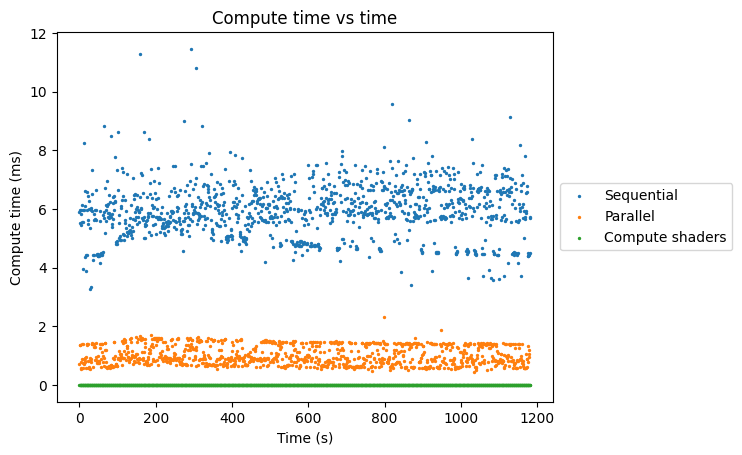

In [154]:
# Compute time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_t["time_stamp_compute_cpu"])) - time_to_seconds(pd_seq_t["time_stamp_compute_cpu"][0])
plt.scatter(xs, pd_seq_t["time_compute_cpu"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_t["time_stamp_compute_cpu"])) - time_to_seconds(pd_par_t["time_stamp_compute_cpu"][0])
plt.scatter(xs, np.array(pd_par_t["time_compute_cpu"])/8, label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_t["time_stamp_compute"])) - time_to_seconds(pd_cs_t["time_stamp_compute"][0])
plt.scatter(xs, pd_cs_t["time_compute"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("Compute time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Compute time vs time")
plt.show()



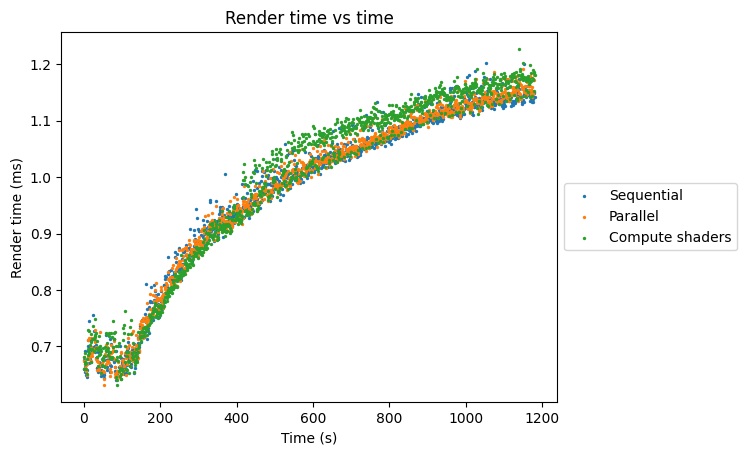

In [155]:
# Render time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_t["time_stamp_render"])) - time_to_seconds(pd_seq_t["time_stamp_render"][0])
plt.scatter(xs, pd_seq_t["time_render"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_t["time_stamp_render"])) - time_to_seconds(pd_par_t["time_stamp_render"][0])
plt.scatter(xs, np.array(pd_par_t["time_render"]), label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_t["time_stamp_render"])) - time_to_seconds(pd_cs_t["time_stamp_render"][0])
plt.scatter(xs, pd_cs_t["time_render"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("Render time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Render time vs time")
plt.show()

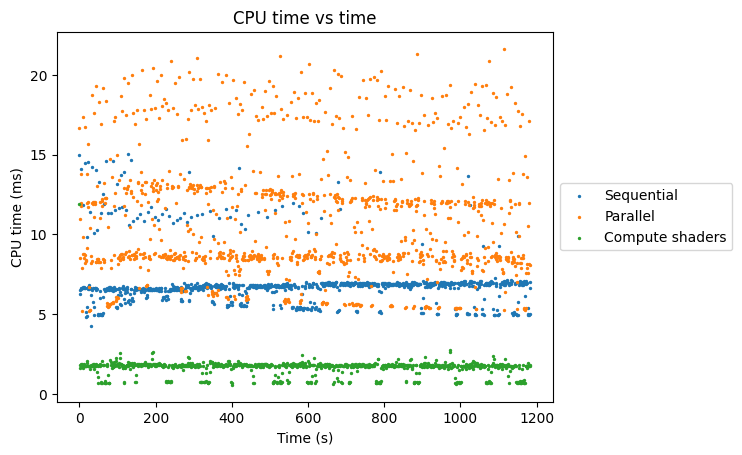

In [156]:
# CPU time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_t["time_stamp_cpu"])) - time_to_seconds(pd_seq_t["time_stamp_cpu"][0])
plt.scatter(xs, pd_seq_t["time_cpu"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_t["time_stamp_cpu"])) - time_to_seconds(pd_par_t["time_stamp_cpu"][0])
plt.scatter(xs, np.array(pd_par_t["time_cpu"]), label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_t["time_stamp_cpu"])) - time_to_seconds(pd_cs_t["time_stamp_cpu"][0])
plt.scatter(xs, pd_cs_t["time_cpu"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("CPU time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("CPU time vs time")
plt.show()

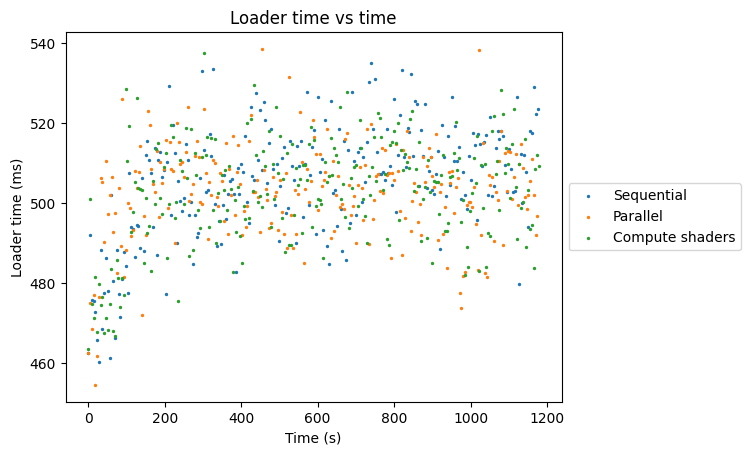

In [157]:
# Loader time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_t["time_stamp_loader"])) - time_to_seconds(pd_seq_t["time_stamp_loader"][0])
plt.scatter(xs, pd_seq_t["time_loader"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_t["time_stamp_loader"])) - time_to_seconds(pd_par_t["time_stamp_loader"][0])
plt.scatter(xs, np.array(pd_par_t["time_loader"]), label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_t["time_stamp_loader"])) - time_to_seconds(pd_cs_t["time_stamp_loader"][0])
plt.scatter(xs, pd_cs_t["time_loader"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("Loader time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Loader time vs time")
plt.show()

# Millions

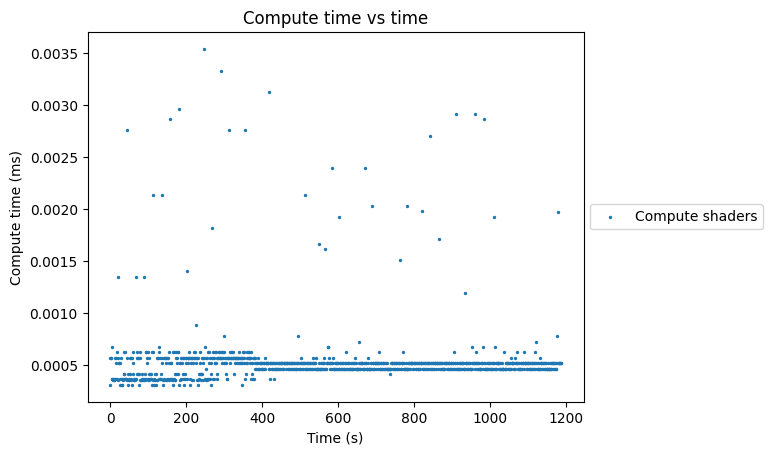

In [158]:
# Compute time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_m["time_stamp_compute_cpu"])) - time_to_seconds(pd_seq_m["time_stamp_compute_cpu"][0])
plt.scatter(xs, pd_seq_m["time_compute_cpu"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_m["time_stamp_compute_cpu"])) - time_to_seconds(pd_par_m["time_stamp_compute_cpu"][0])
plt.scatter(xs, np.array(pd_par_m["time_compute_cpu"])/8, label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_m["time_stamp_compute"])) - time_to_seconds(pd_cs_m["time_stamp_compute"][0])
plt.scatter(xs, pd_cs_m["time_compute"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("Compute time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Compute time vs time")
plt.show()

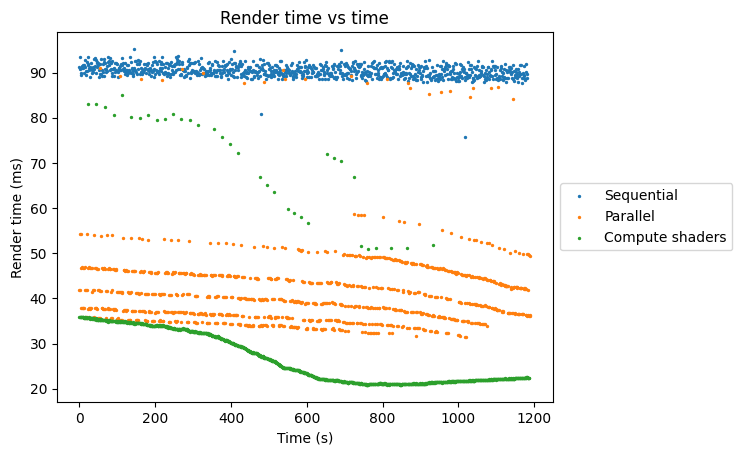

In [159]:
# Render time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_m["time_stamp_render"])) - time_to_seconds(pd_seq_m["time_stamp_render"][0])
plt.scatter(xs, pd_seq_m["time_render"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_m["time_stamp_render"])) - time_to_seconds(pd_par_m["time_stamp_render"][0])
plt.scatter(xs, np.array(pd_par_m["time_render"]), label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_m["time_stamp_render"])) - time_to_seconds(pd_cs_m["time_stamp_render"][0])
plt.scatter(xs, pd_cs_m["time_render"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("Render time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Render time vs time")
plt.show()

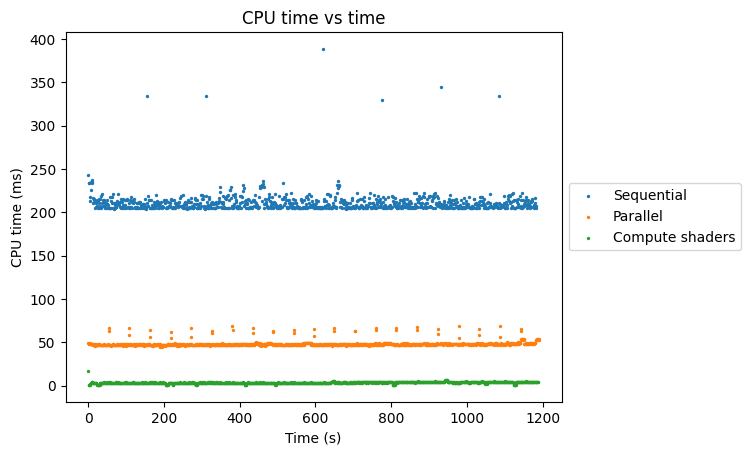

In [160]:
# CPU time vs time
xs = vectorized_time_to_seconds(np.array(pd_seq_m["time_stamp_cpu"])) - time_to_seconds(pd_seq_m["time_stamp_cpu"][0])
plt.scatter(xs, pd_seq_m["time_cpu"], label="Sequential", s=2)

xs = vectorized_time_to_seconds(np.array(pd_par_m["time_stamp_cpu"])) - time_to_seconds(pd_par_m["time_stamp_cpu"][0])
plt.scatter(xs, np.array(pd_par_m["time_cpu"])/8, label="Parallel", s=2)

xs = vectorized_time_to_seconds(np.array(pd_cs_m["time_stamp_cpu"])) - time_to_seconds(pd_cs_m["time_stamp_cpu"][0])
plt.scatter(xs, pd_cs_m["time_cpu"], label="Compute shaders", s=2)

plt.xlabel("Time (s)")
plt.ylabel("CPU time (ms)")

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("CPU time vs time")
plt.show()